### 안녕하세요!
### 프3 기말과제 발표 - 제명수 입니다.
# 대한민국 대표 기업 공시 채널 : KIND 에서 얻은 주식 데이터
### 를 이용하여 발표하겠습니다.

### https://kind.krx.co.kr/main.do?method=loadInitPage&scrnmode=1

In [1]:
import pandas as pd
import numpy as np

stock = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/주식발행내역.csv")

In [2]:
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,"23,500",500,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,"259,384",500,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,"20,000",500,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,"873,362",500,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,"1,706,484",500,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,"161,320","1,000",주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,"80,818",500,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,"63,492",500,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,"294,985",500,유상증자(일반공모)


In [3]:
cols = stock.columns
cols

Index(['회사명', '종목코드', '상장(예정)일', '상장방식', '발행주식수', '액면가', '발행사유'], dtype='object')

In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   회사명      1225 non-null   object
 1   종목코드     1225 non-null   int64 
 2   상장(예정)일  1225 non-null   object
 3   상장방식     1225 non-null   object
 4   발행주식수    1225 non-null   object
 5   액면가      1225 non-null   object
 6   발행사유     1225 non-null   object
dtypes: int64(1), object(6)
memory usage: 67.1+ KB


In [5]:
stock.isna().sum()   # 결측치는 없습니다.

회사명        0
종목코드       0
상장(예정)일    0
상장방식       0
발행주식수      0
액면가        0
발행사유       0
dtype: int64

In [6]:
stock.describe()

,종목코드
count,1225.000000
mean,117291.918367
std,116775.302311
min,220.000000
25%,25440.000000
50%,73570.000000
75%,208640.000000
max,950220.000000


### >>> int형이 종목코드 밖에 없네요...  종목코드의 dtype 을 더 작은 걸로 바꿔줘야할 것 같아요.

In [7]:
stock.describe(include=object) 

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
count,1225,1225,1225,1225,1225,1225
unique,602,62,3,1034,10,35
top,HMM,2021-04-16,추가상장,0,500,국내사모 전환사채 전환
freq,21,42,1068,71,910,313


### 회사명에 왜 HMM 이 21번이나 나올까요?  >>>  있다가 보겠습니다.

In [8]:
stock.발행사유.nunique()

35

In [9]:
stock.상장방식.nunique()

3

### 1. 발행사유, 상장방식은 category 타입으로 바꿔주겠습니다.

In [10]:
stock.액면가.nunique()

10

In [11]:
stock.발행주식수.nunique()

1034

### 2. 액면가, 발행주식수 는 int 형으로 형변환 시켜주겠습니다.
#### >>> sum 도 구할 것이고, 내림차순 정렬해 줄 꺼니까

In [12]:
stock.발행주식수 = stock.발행주식수.str.replace(',','').astype('int64')   
# (발행주식수)에서 3째자리마다 있는, 쉼표를 제거하고, 정수형으로 변환하겠습니다.

In [13]:
stock      #제거 완료!

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,23500,500,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,259384,500,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,20000,500,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,873362,500,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,1706484,500,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,161320,"1,000",주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,80818,500,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,63492,500,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,294985,500,유상증자(일반공모)


In [14]:
# pd.set_option('display.max_rows', None)   # 모든 행 다 출력하기!!   (액면가) 결측치가 있는지 확인해야겟습니다.

In [15]:
stock.액면가

0         500
1         500
2         500
3         500
4         500
        ...  
1220    1,000
1221      500
1222      500
1223      500
1224      500
Name: 액면가, Length: 1225, dtype: object

In [16]:
stock.액면가.isnull().sum()

0

### 결측치는 0으로 처리하고, 쉼표도  제거하겠습니다

In [17]:
stock.액면가 = stock.액면가.str.replace(',','').replace('-','0').astype('float64')

In [18]:
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,23500,500.0,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,259384,500.0,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,20000,500.0,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,873362,500.0,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,1706484,500.0,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,161320,1000.0,주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,80818,500.0,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,63492,500.0,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,294985,500.0,유상증자(일반공모)


### 1. 액면분할을 적게한 주식 (액면가가 높은) 순으로, 시가총액 큰 순으로 보겠습니다.

In [19]:
stock.액면가.nunique()

9

In [20]:
stock.nlargest(100, '액면가').nsmallest(100, '발행주식수')

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
69,디지탈옵틱,106520,2021-05-14,변경상장,-50767096,1000.0,감자(무상)
430,우성사료,6980,2021-04-19,변경상장,-27810000,5000.0,액면병합
822,미래에셋증권,6800,2021-03-24,변경상장,-10000000,5000.0,주식소각
1071,현대모비스,12330,2021-03-02,변경상장,-261600,5000.0,주식소각
569,ES큐브,50120,2021-04-13,변경상장,0,5000.0,상호변경
...,...,...,...,...,...,...,...
22,기업은행,24110,2021-05-17,추가상장,5636227,5000.0,유상증자(제3자배정)
740,HMM,11200,2021-03-31,추가상장,9443599,5000.0,국내CB전환
894,한화솔루션,9830,2021-03-18,추가상장,31414000,5000.0,유상증자(구주주배정)
542,두산중공업,34020,2021-04-14,추가상장,47843956,5000.0,유상증자(제3자배정)


In [21]:
stock.액면가.sort_values(ascending=False)

652    5000.0
564    5000.0
136    5000.0
511    5000.0
510    5000.0
        ...  
631       0.0
636       0.0
635       0.0
633       0.0
632       0.0
Name: 액면가, Length: 1225, dtype: float64

<AxesSubplot:>

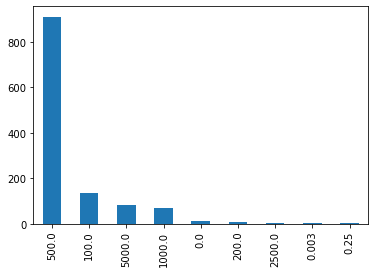

In [22]:
stock.액면가.value_counts().plot(kind='bar')

#### 원래 주식은 보통 5000원짜리 주식인데, 500원짜리가 제일 많네요. 10분할 한거네요.

In [23]:
stock.nsmallest(20, '액면가')   

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
631,KBSTAR 미국S&P500,379780,2021-04-09,신규상장,900000,0.000,신규상장
632,KBSTAR 유로스탁스50(H),379790,2021-04-09,신규상장,800000,0.000,신규상장
633,KODEX 미국S&P500TR,379800,2021-04-09,신규상장,4000000,0.000,신규상장
634,KODEX 미국나스닥100TR,379810,2021-04-09,신규상장,4000000,0.000,신규상장
635,TIGER 미국테크TOP10 INDXX,381170,2021-04-09,신규상장,1400000,0.000,신규상장
636,TIGER 미국필라델피아반도체나스닥,381180,2021-04-09,신규상장,1400000,0.000,신규상장
724,KINDEX Fn5G플러스,380340,2021-04-02,신규상장,1000000,0.000,신규상장
725,HANARO Fn전기&수소차,381560,2021-04-02,신규상장,800000,0.000,신규상장
726,HANARO Fn친환경에너지,381570,2021-04-02,신규상장,800000,0.000,신규상장
933,네오이뮨텍,950220,2021-03-16,신규상장,98392010,0.000,신규


#### 액면가 제일 작은 것들은, 신규상장 주식이어서, 표시가 안돼 있네요.

In [24]:
stock.발행사유.drop_duplicates()

0                      스톡옵션행사
1                국내사모 전환사채 전환
2                   주식매수선택권행사
16               국내공모 전환사채 전환
19                     국내CB전환
20     국내공모 신주인수권부사채 신주인수권 행사
22                유상증자(제3자배정)
24                 유상증자(출자전환)
28                     감자(무상)
32                 우선주의 보통주전환
36                    타법인흡수합병
37                       상호변경
38                       유상증자
41                    신주인수권행사
50                    주식의종류변경
52                     국내BW행사
59                       무상증자
63     국내사모 신주인수권부사채 신주인수권 행사
75                         신규
77                       주식소각
80                       이익소각
89                유상증자(구주주배정)
117                유상증자(공모증자)
193                      액면병합
208                      액면분할
255                      주식배당
427                        합병
585                    해외CB전환
630              우리사주매수선택권 행사
631                      신규상장
648                유상증자(일반공모)
872                  감자(주식병합)
938                  회사분할(존속)
941       

In [25]:
stock.발행사유 = stock.발행사유.astype("category")

In [26]:
stock1 = stock[['회사명', '발행주식수', '액면가']]
stock1

,회사명,발행주식수,액면가
0,에쓰씨엔지니어링,23500,500.0
1,엠젠플러스,259384,500.0
2,아이씨디,20000,500.0
3,젬백스지오,873362,500.0
4,상지카일룸,1706484,500.0
...,...,...,...
1220,셀트리온헬스케어,161320,1000.0
1221,피엔티,80818,500.0
1222,알엔투테크놀로지,63492,500.0
1223,휴벡셀,294985,500.0


# ★ 1. (발행주식수) 최대인 것 10개만 봅시다! 

In [27]:
stock1.sort_values(by='발행주식수').nlargest(10, '발행주식수')

,회사명,발행주식수,액면가
515,카카오,355047444,100.0
592,판타지오,317446928,100.0
818,대한항공,173611112,5000.0
793,스킨앤스킨,121359223,100.0
871,유양디앤유,118000000,500.0
933,네오이뮨텍,98392010,0.0
972,현대무벡스,93102324,100.0
809,초록뱀컴퍼니,87719295,100.0
903,SK바이오사이언스,76500000,500.0
117,SK아이이테크놀로지,71297592,1000.0


### (카카오) 가 3억 5천만개로, 가장 많다고 뜨네요..?
### ★ (삼성전자) 가 왜 없을까요?  진짜 없는지 봅시다!

In [28]:
print(stock1.loc[(stock1['회사명'] == '삼성전자')])

Empty DataFrame
Columns: [회사명, 발행주식수, 액면가]
Index: []


### 음.. 진짜 없네요??  참고로, 삼성전자 주식수 = 약 59억개입니다.  아마 우리나라에서 제일 많을 거예요. 
##### 그런데, 그게 안보이다니..   이 데이터를 신뢰할 수 있을지.. 잘 모르겠습니다.

### ★ 2. 이번에는 액면가가 높은 순으로 보는데, 각 액면가별로, (발행주식수) 가장 많은 1등만 보겠습니다!

In [29]:
(
stock1
.sort_values(['액면가','발행주식수'], ascending=False)
.drop_duplicates(subset='액면가')
)

,회사명,발행주식수,액면가
818,대한항공,173611112,5000.000
185,하이트론씨스템즈,507440,2500.000
117,SK아이이테크놀로지,71297592,1000.000
871,유양디앤유,118000000,500.000
1056,이아이디,50000000,200.000
515,카카오,355047444,100.000
585,엘브이엠씨,15106708,0.250
1208,뉴프라이드,1650617,0.003
933,네오이뮨텍,98392010,0.000


### ★ 3. 이번에는 액면가가 가장 높은 주식들 중에, 주식수가 가장 적은 순으로 15개만 보겠습니다!

In [30]:
(
stock1
.sort_values(['액면가','발행주식수'], ascending=[False, True])
)

,회사명,발행주식수,액면가
430,우성사료,-27810000,5000.0
822,미래에셋증권,-10000000,5000.0
1071,현대모비스,-261600,5000.0
563,금호건설,0,5000.0
564,금호건설,0,5000.0
...,...,...,...
635,TIGER 미국테크TOP10 INDXX,1400000,0.0
636,TIGER 미국필라델피아반도체나스닥,1400000,0.0
633,KODEX 미국S&P500TR,4000000,0.0
634,KODEX 미국나스닥100TR,4000000,0.0


In [31]:
(
stock1
.sort_values('액면가', ascending=False)
.head(50)
.sort_values('발행주식수', ascending=True)
.head(10)
)

,회사명,발행주식수,액면가
430,우성사료,-27810000,5000.0
569,ES큐브,0,5000.0
673,미래에셋증권,0,5000.0
564,금호건설,0,5000.0
672,미래에셋증권,0,5000.0
671,미래에셋증권,0,5000.0
563,금호건설,0,5000.0
683,기아,0,5000.0
943,두산중공업,3,5000.0
944,두산중공업,171,5000.0


In [32]:
stock1 = stock1.replace(0, np.nan)   # 0을 na 값으로 대체하고, 그걸 dropna() 시켜서 다시 보겠습니다.

In [33]:
(
stock1
.sort_values('액면가', ascending=False)
.head(50)
.sort_values('발행주식수', ascending=True)
.head(10)
)

,회사명,발행주식수,액면가
430,우성사료,-27810000.0,5000.0
943,두산중공업,3.0,5000.0
944,두산중공업,171.0,5000.0
852,두산인프라코어,1707.0,5000.0
437,키움증권,2850.0,5000.0
1038,GS건설,7656.0,5000.0
533,SK케미칼,10000.0,5000.0
847,키움증권,19002.0,5000.0
1134,키움증권,19002.0,5000.0
978,키움증권,19002.0,5000.0


### (우성사료) 의 실제 주식수는, 3090000주  309만주 입니다.
### 그런데, -2781만 주가 써있죠?  왜 그럴까요?
### (우성사료)는 적정 유통주식수 유지를 위해, 1주당 가액을 500원에서 5000원으로 늘리는 주식병합을 결정했다고 17일 공시했다.  (뉴스보도)
# 즉, 10주를 1주로 합친겁니다!  주식 수는 10분의 1로 줄겠죠? 동시에, 주당 가격은 10배 뛰겠죠? 
### >>>  (카카오)는 주식을 쪼개면서, 주식을 늘렸는데, 왜 (우성사료)는 있던 주식 10개를 1개로 합쳤을까요?
### >>>  (이미지 개선) 을 위한 것으로 추정됩니다.   "마! 우리 싸구려 사료 아니다!!" 같은 거죠? ^__^
### >>>  반면에, (카카오) 주당 가격이 너무 비싸서, 주식 거래가 줄어들자, 주식을 쪼개게 됩니다!!  주식이 너무 비싸도, 문제가 생깁니다. 1주당 300만원이 넘는다면, 잘 사질 못하겠죠?
### >>>  "카카오도 싸게 내놨으니까, 다 사가세요!"  이런 겁니다.  >>>   이로 인해, 거래량 폭발!!
### >>> 둘다 장단점이 있겠죠?
### >>>  아무튼, 그래서, (우성사료) 올 4월에는 한때 거래정지가 되기도 했다고 합니다.  이런 경우도 생김.

In [34]:
(
stock1
.sort_values('액면가', ascending=False)
.head(50)
.drop_duplicates('회사명')
.sort_values('발행주식수', ascending=True)
.head(30)
)

,회사명,발행주식수,액면가
430,우성사료,-27810000.0,5000.0
944,두산중공업,171.0,5000.0
437,키움증권,2850.0,5000.0
533,SK케미칼,10000.0,5000.0
136,동부건설,19891.0,5000.0
379,디아이동일,45046.0,5000.0
255,원림,97970.0,5000.0
1123,이수화학,195312.0,5000.0
1085,신원종합개발,200000.0,5000.0
403,HMM,383252.0,5000.0


### 5000원 짜리 주식은 이게 단가요?  29개!!?   확인해봅시다! 

In [35]:
print(stock1.loc[(stock1['액면가'] == 5000)].drop_duplicates("회사명"))

           회사명        발행주식수     액면가
22        기업은행    5636227.0  5000.0
43         휴스틸      34097.0  5000.0
44     한일현대시멘트     953245.0  5000.0
108    두산인프라코어     122662.0  5000.0
124       키움증권      38005.0  5000.0
136       동부건설      19891.0  5000.0
221       이수화학     390625.0  5000.0
255         원림      97970.0  5000.0
379      디아이동일      45046.0  5000.0
403        HMM     383252.0  5000.0
430       우성사료  -27810000.0  5000.0
533      SK케미칼      10000.0  5000.0
542      두산중공업   47843956.0  5000.0
563       금호건설          NaN  5000.0
569       ES큐브          NaN  5000.0
610   SGC이테크건설     442864.0  5000.0
642       에이리츠     424615.0  5000.0
649       DL건설          NaN  5000.0
652    현대코퍼레이션          NaN  5000.0
671     미래에셋증권          NaN  5000.0
683         기아          NaN  5000.0
707     신원종합개발     200000.0  5000.0
818       대한항공  173611112.0  5000.0
870       GS건설     202773.0  5000.0
894      한화솔루션   31414000.0  5000.0
963     SNT모티브          NaN  5000.0
1071     현대모비스    -261600.0 

In [36]:
stock1.loc[(stock1['액면가'] == 5000)].drop_duplicates("회사명").회사명

22          기업은행
43           휴스틸
44       한일현대시멘트
108      두산인프라코어
124         키움증권
136         동부건설
221         이수화학
255           원림
379        디아이동일
403          HMM
430         우성사료
533        SK케미칼
542        두산중공업
563         금호건설
569         ES큐브
610     SGC이테크건설
642         에이리츠
649         DL건설
652      현대코퍼레이션
671       미래에셋증권
683           기아
707       신원종합개발
818         대한항공
870         GS건설
894        한화솔루션
963       SNT모티브
1071       현대모비스
1210       풍산홀딩스
Name: 회사명, dtype: object

# 네. 5000원짜리 주식은 딱 29개 있네요.
### 제 눈엔, 이것들이 황금알을 낳을 수도 있는(?), 거위들로 보이네요. ㅎㅎ
##### 물론! 이게 엄청난 단서, 뭐 그런건 아니지만
### 여기서 잘만 고른다면, 그 회사가 미래에 (액분) 을 할 수도 있고, 액분을 한다면, 
### 주가가 크게 오를 가능성이 높으니까요!

In [37]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   회사명      1225 non-null   object  
 1   종목코드     1225 non-null   int64   
 2   상장(예정)일  1225 non-null   object  
 3   상장방식     1225 non-null   object  
 4   발행주식수    1225 non-null   int64   
 5   액면가      1225 non-null   float64 
 6   발행사유     1225 non-null   category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 60.3+ KB


In [38]:
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,23500,500.0,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,259384,500.0,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,20000,500.0,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,873362,500.0,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,1706484,500.0,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,161320,1000.0,주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,80818,500.0,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,63492,500.0,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,294985,500.0,유상증자(일반공모)


# 이제 2번째 데이터를 한번 보겠습니다!

In [39]:
from IPython.display import Image

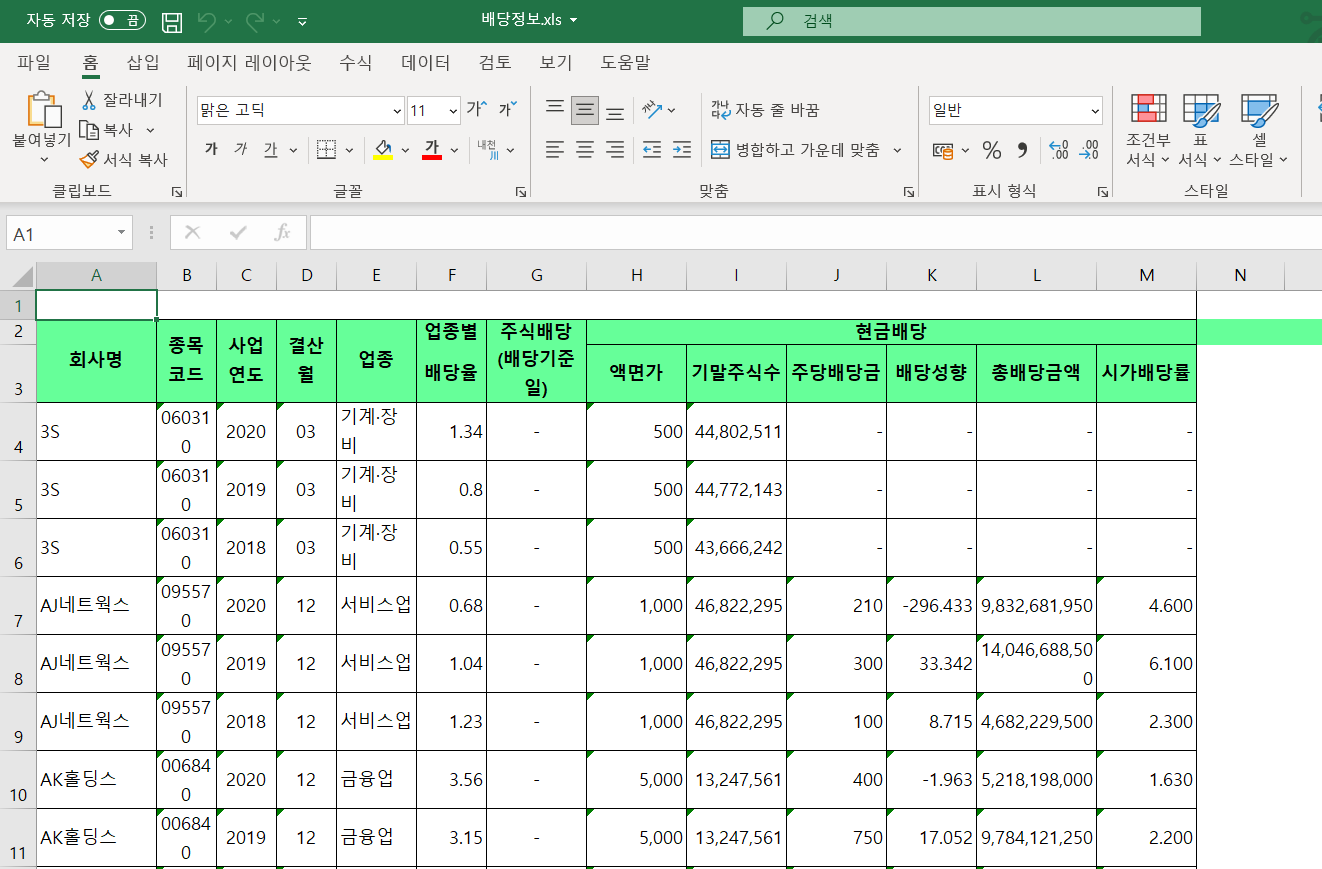

In [40]:
Image("C:/Users/chemy/Desktop/프3프로젝트/1.png")

### 총배당금액  (AJ네트웍스) = 98 억원 규모네요..   흠  저 회사에서 주주들한테, 1년에 98억을 쏜다?  웬지 맞을거 같아요.
### 시총 : 2716억원, 배당수익률 = 3.62% 니까.   저기 있는 (배당율) 은 뭘까? 또 궁금해집니다!

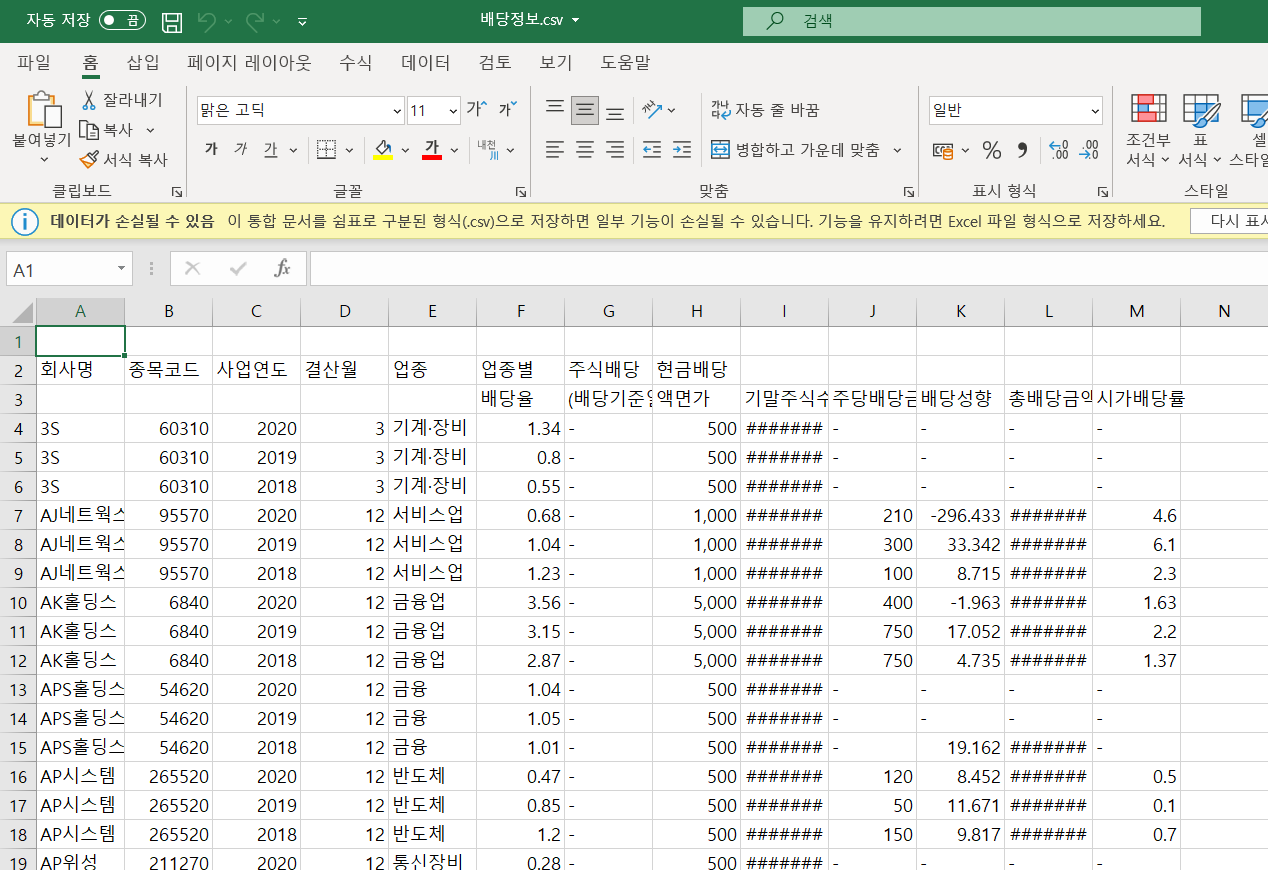

In [41]:
Image("C:/Users/chemy/Desktop/프3프로젝트/2.png")

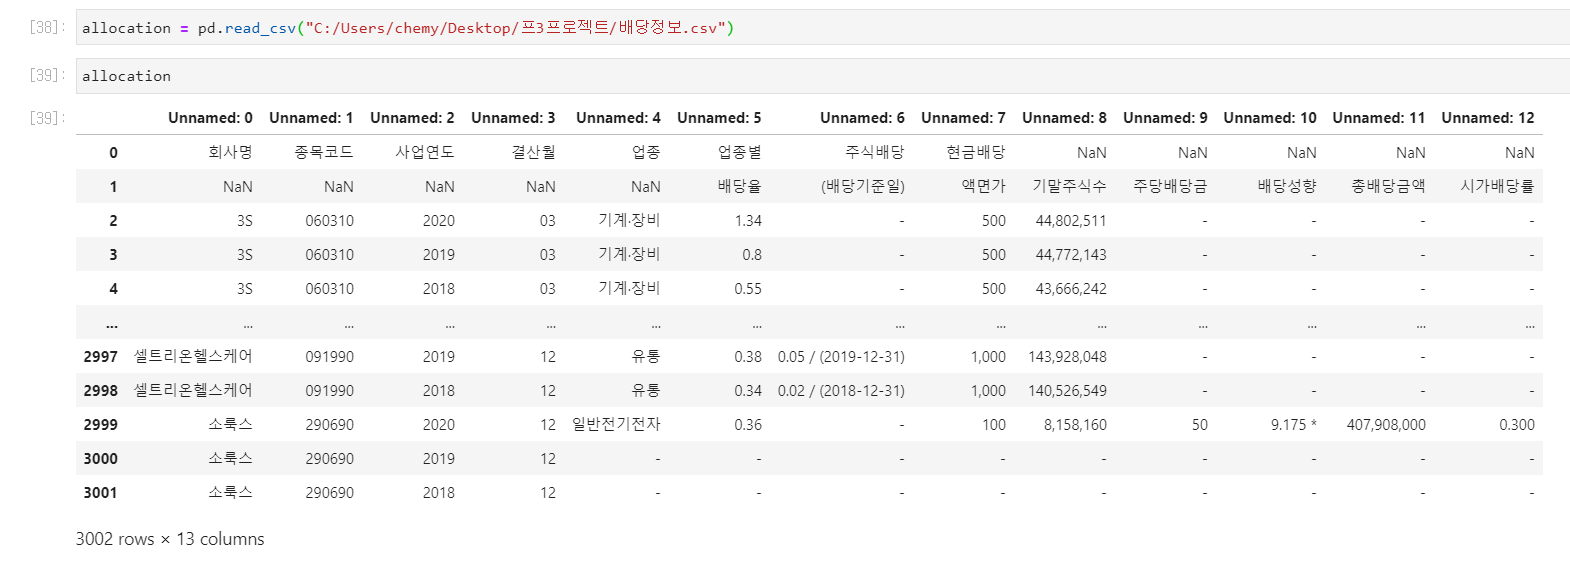

In [42]:
Image("C:/Users/chemy/Desktop/프3프로젝트/3.png")

### 그런데 컬럼 이름이 이상해졌네요. 고쳐봅시다.

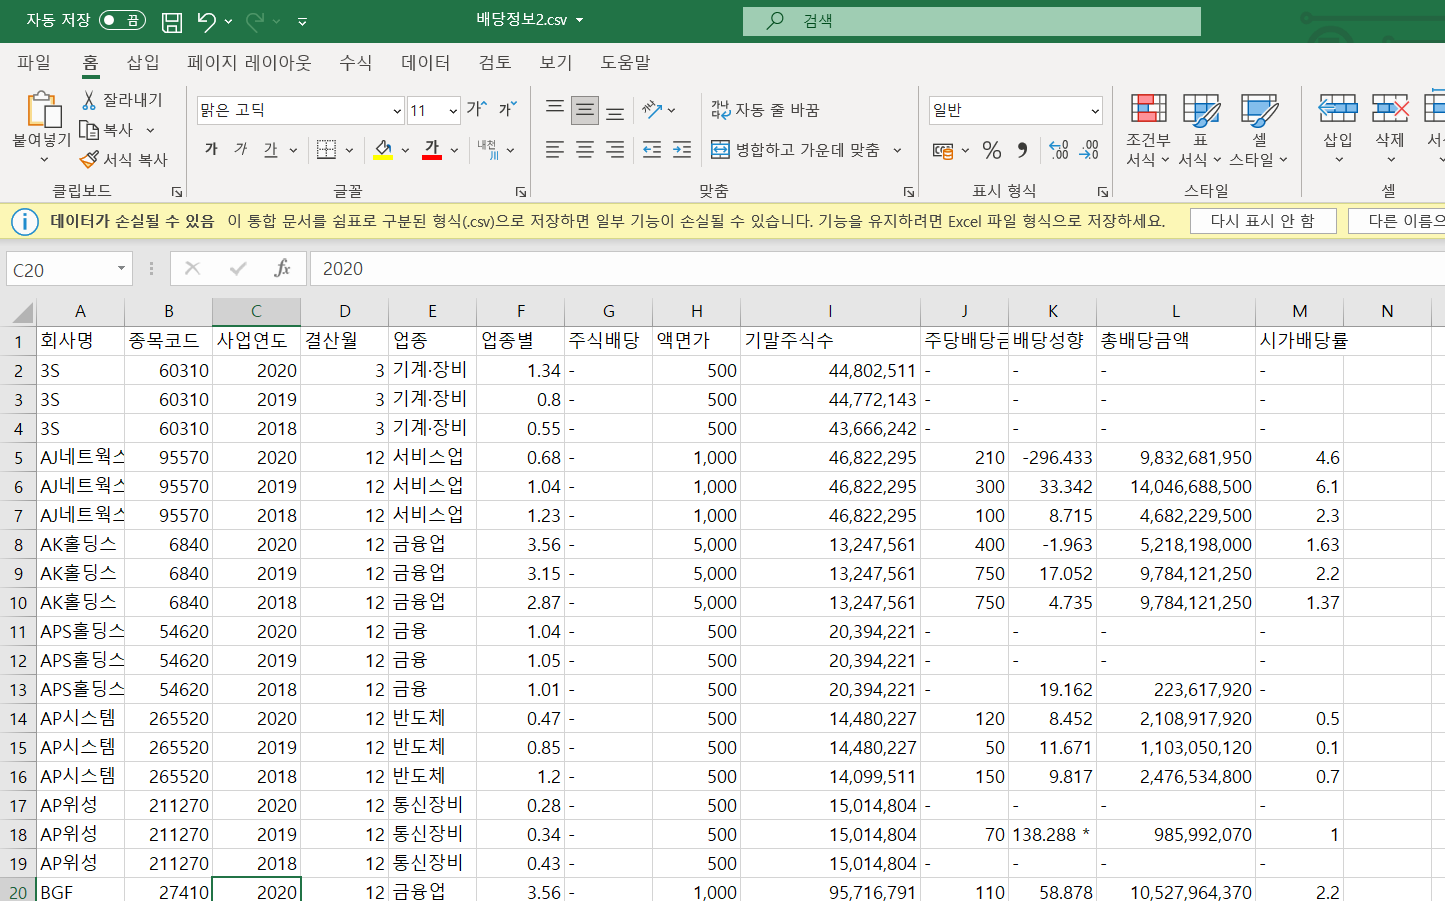

In [43]:
Image("C:/Users/chemy/Desktop/프3프로젝트/4.png")

## Excel 을 이용해서, 아예 컬럼을 정리해줬습니다!

In [44]:
allocation = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/배당정보2.csv")

In [45]:
allocation

,회사명,종목코드,사업연도,결산월,업종,업종별,주식배당,액면가,기말주식수,주당배당금,배당성향,총배당금액,시가배당률
0,3S,60310,2020,3,기계·장비,1.34,-,500,"44,802,511",-,-,-,-
1,3S,60310,2019,3,기계·장비,0.8,-,500,"44,772,143",-,-,-,-
2,3S,60310,2018,3,기계·장비,0.55,-,500,"43,666,242",-,-,-,-
3,AJ네트웍스,95570,2020,12,서비스업,0.68,-,"1,000","46,822,295",210,-296.433,"9,832,681,950",4.6
4,AJ네트웍스,95570,2019,12,서비스업,1.04,-,"1,000","46,822,295",300,33.342,"14,046,688,500",6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,셀트리온헬스케어,91990,2019,12,유통,0.38,0.05 / (2019-12-31),"1,000","143,928,048",-,-,-,-
2996,셀트리온헬스케어,91990,2018,12,유통,0.34,0.02 / (2018-12-31),"1,000","140,526,549",-,-,-,-
2997,소룩스,290690,2020,12,일반전기전자,0.36,-,100,"8,158,160",50,9.175 *,"407,908,000",0.3
2998,소룩스,290690,2019,12,-,-,-,-,-,-,-,-,-


### 2994,2995,2996  (셀트리온헬스케어) 에 관한 정보를 한번 대충 봅시다!

In [46]:
allocation.iloc[2994:2997]   

,회사명,종목코드,사업연도,결산월,업종,업종별,주식배당,액면가,기말주식수,주당배당금,배당성향,총배당금액,시가배당률
2994,셀트리온헬스케어,91990,2020,12,유통,0.18,0.02 / (2020-12-31),"1,000","151,809,822",-,-,-,-
2995,셀트리온헬스케어,91990,2019,12,유통,0.38,0.05 / (2019-12-31),"1,000","143,928,048",-,-,-,-
2996,셀트리온헬스케어,91990,2018,12,유통,0.34,0.02 / (2018-12-31),"1,000","140,526,549",-,-,-,-


#### (셀트리온헬스케어) 의 배당률이 주가 대비, 2% 인 걸 보면, (주식배당) 항목이 
# (배당수익률) 을 의미하는거 맞네요!!! Gooood

### 이제, 항목에 대해서, 간략히 봅시다.
### 그리고, 이게 제대로 된 데이터인지, 살펴봅시다.
# 1. '업종' 은 알겠는데, '업종별' 은 뭘까요?
#### 2. '주식배당' 항목과 '시가배당률' 의 차이는?

In [47]:
allocation.iloc[2997]  

회사명              소룩스
종목코드          290690
사업연도            2020
결산월               12
업종            일반전기전자
업종별             0.36
주식배당               -
액면가              100
기말주식수      8,158,160
주당배당금             50
배당성향         9.175 *
총배당금액    407,908,000
시가배당률            0.3
Name: 2997, dtype: object

#### '시가배당률' 은 3년치 배당률의 평균을 잡은거라서, 보통 말하는, (배당률) 과 같습니다. 
#### 그래도 좀 보죠!

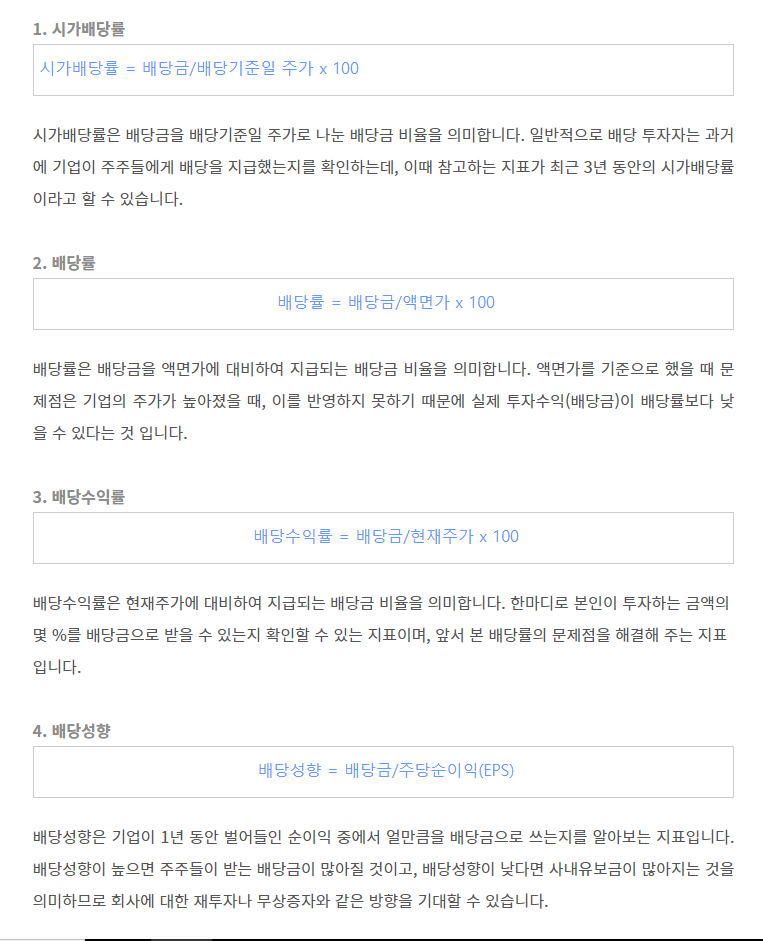

In [48]:
Image("C:/Users/chemy/Desktop/프3프로젝트/배당관련정보.png")

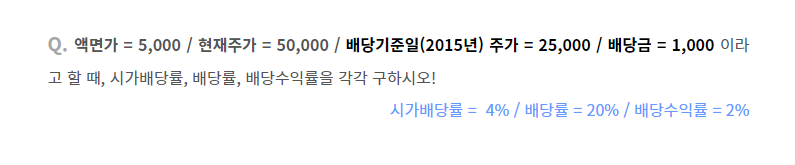

In [49]:
Image("C:/Users/chemy/Desktop/프3프로젝트/구하는법.png")

# 대충 이렇습니다. ^___^

### - 아래는, (배당정보) 페이지 밑에 달린, 주석 입니다.
##### 위 정보는 상장법인이 제출한 ‘주식배당결정’ 및 ‘정기주주총회 결과’ 공시의 배당 관련 내용을 기준으로 제공합니다.
### ★ 단, 배당성향 = 배당금총액 ÷ 연결 당기순이익  (*표시는 배당성향 = 배당금총액 ÷ 개별 당기순이익 입니다.)
##### 주권, 외국주권, 주식예탁증권(DR)을 상장한 법인에 대한 배당관련 정보를 제공하며, 제공기간은 2010년도부터 최근 사업연도까지 입니다.
### ★ 결산월은 조회하는 사업연도와 상관없이 현재 기준 결산월입니다.
##### 금년도 업종변경 기업의 업종배당 정보는 변경 후 기준으로 익년부터 반영됩니다.

In [50]:
alloc = allocation

# 1. 아까랑 동일하게, 액면가 & 기말주식수 & 총배당금액 형변환!!

In [51]:
alloc.액면가 = alloc.액면가.str.replace(',','').replace('-','0').astype('float16')
alloc.기말주식수 = alloc.기말주식수.str.replace(',','').replace('-','0').astype('int64') 

In [52]:
alloc

,회사명,종목코드,사업연도,결산월,업종,업종별,주식배당,액면가,기말주식수,주당배당금,배당성향,총배당금액,시가배당률
0,3S,60310,2020,3,기계·장비,1.34,-,500.0,44802511,-,-,-,-
1,3S,60310,2019,3,기계·장비,0.8,-,500.0,44772143,-,-,-,-
2,3S,60310,2018,3,기계·장비,0.55,-,500.0,43666242,-,-,-,-
3,AJ네트웍스,95570,2020,12,서비스업,0.68,-,1000.0,46822295,210,-296.433,"9,832,681,950",4.6
4,AJ네트웍스,95570,2019,12,서비스업,1.04,-,1000.0,46822295,300,33.342,"14,046,688,500",6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,셀트리온헬스케어,91990,2019,12,유통,0.38,0.05 / (2019-12-31),1000.0,143928048,-,-,-,-
2996,셀트리온헬스케어,91990,2018,12,유통,0.34,0.02 / (2018-12-31),1000.0,140526549,-,-,-,-
2997,소룩스,290690,2020,12,일반전기전자,0.36,-,100.0,8158160,50,9.175 *,"407,908,000",0.3
2998,소룩스,290690,2019,12,-,-,-,0.0,0,-,-,-,-


In [53]:
alloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     3000 non-null   object 
 1   종목코드    3000 non-null   int64  
 2   사업연도    3000 non-null   int64  
 3   결산월     3000 non-null   int64  
 4   업종      3000 non-null   object 
 5   업종별     3000 non-null   object 
 6   주식배당    3000 non-null   object 
 7   액면가     3000 non-null   float16
 8   기말주식수   3000 non-null   int64  
 9   주당배당금   3000 non-null   object 
 10  배당성향    3000 non-null   object 
 11  총배당금액   3000 non-null   object 
 12  시가배당률   3000 non-null   object 
dtypes: float16(1), int64(4), object(8)
memory usage: 287.2+ KB


In [54]:
alloc.사업연도.astype('int8')

0      -28
1      -29
2      -30
3      -28
4      -29
        ..
2995   -29
2996   -30
2997   -28
2998   -29
2999   -30
Name: 사업연도, Length: 3000, dtype: int8

In [55]:
alloc.사업연도.astype('int16')

0       2020
1       2019
2       2018
3       2020
4       2019
        ... 
2995    2019
2996    2018
2997    2020
2998    2019
2999    2018
Name: 사업연도, Length: 3000, dtype: int16

In [56]:
alloc.사업연도 = alloc.사업연도.astype('int16')

In [57]:
alloc.결산월.nlargest(2000)   # 거의 다 12월이네요. 

3       12
4       12
5       12
6       12
7       12
        ..
2037    12
2038    12
2039    12
2040    12
2041    12
Name: 결산월, Length: 2000, dtype: int64

In [58]:
alloc.결산월.nunique()   

6

In [59]:
alloc.결산월 = alloc.결산월.astype('category')

In [60]:
alloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   회사명     3000 non-null   object  
 1   종목코드    3000 non-null   int64   
 2   사업연도    3000 non-null   int16   
 3   결산월     3000 non-null   category
 4   업종      3000 non-null   object  
 5   업종별     3000 non-null   object  
 6   주식배당    3000 non-null   object  
 7   액면가     3000 non-null   float16 
 8   기말주식수   3000 non-null   int64   
 9   주당배당금   3000 non-null   object  
 10  배당성향    3000 non-null   object  
 11  총배당금액   3000 non-null   object  
 12  시가배당률   3000 non-null   object  
dtypes: category(1), float16(1), int16(1), int64(2), object(8)
memory usage: 249.4+ KB


In [61]:
alloc.업종.value_counts()

-          340
화학         231
금융업        108
서비스업       104
제약         104
IT부품       100
유통          99
반도체         94
전기전자        94
기타서비스       93
금융          91
금속          89
운수장비        87
기계·장비       87
운송장비·부품     84
철강금속        82
음식료품        81
소프트웨어       77
유통업         75
디지털컨텐츠      67
의료·정밀기기     65
기계          65
일반전기전자      59
의약품         57
통신장비        51
건설          48
건설업         45
증권          33
음식료·담배      31
섬유의복        29
비금속         29
운수창고업       27
출판·매체복제     26
오락·문화       26
종이목재        24
비금속광물       23
보험          21
종이·목재       21
정보기기        19
방송서비스       17
전기가스업       16
컴퓨터서비스      15
기타제조        14
인터넷         13
의료정밀         9
섬유·의류        9
통신업          6
운송           6
통신서비스        6
은행           3
Name: 업종, dtype: int64

In [62]:
alloc.업종 = alloc.업종.astype('category')

In [63]:
alloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   회사명     3000 non-null   object  
 1   종목코드    3000 non-null   int64   
 2   사업연도    3000 non-null   int16   
 3   결산월     3000 non-null   category
 4   업종      3000 non-null   category
 5   업종별     3000 non-null   object  
 6   주식배당    3000 non-null   object  
 7   액면가     3000 non-null   float16 
 8   기말주식수   3000 non-null   int64   
 9   주당배당금   3000 non-null   object  
 10  배당성향    3000 non-null   object  
 11  총배당금액   3000 non-null   object  
 12  시가배당률   3000 non-null   object  
dtypes: category(2), float16(1), int16(1), int64(2), object(7)
memory usage: 231.7+ KB


<AxesSubplot:>

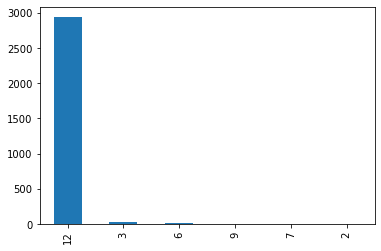

In [64]:
alloc.결산월.value_counts().plot(kind='bar')

#### 결산월 : "기업에서 제출하는 정기보고서 제출기한"   거의 99% 12월 결산입니다.  매우 뻔한 정보죠? ;;

### ★ 5   업종별     3000 non-null   object
### ★ 9   주당배당금   3000 non-null   object  
### ★ 10  배당성향    3000 non-null   object  
### ★ 11  총배당금액   3000 non-null   object  
### ★ 12  시가배당률   3000 non-null   object
### 나머지도, dtype 적절하게!

In [65]:
alloc.업종별.str.replace(',','').replace('-','0').astype('float16')   

0       1.339844
1       0.799805
2       0.549805
3       0.680176
4       1.040039
          ...   
2995    0.379883
2996    0.340088
2997    0.360107
2998    0.000000
2999    0.000000
Name: 업종별, Length: 3000, dtype: float16

In [66]:
alloc.업종별 = alloc.업종별.str.replace(',','').replace('-','0').astype('float16')   

<AxesSubplot:ylabel='Frequency'>

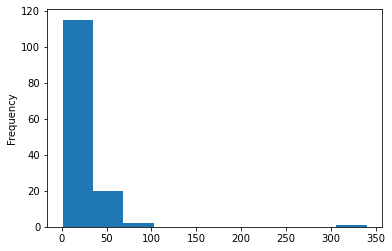

In [67]:
alloc.업종별.value_counts().plot(kind="hist")

In [68]:
alloc.업종별

0       1.339844
1       0.799805
2       0.549805
3       0.680176
4       1.040039
          ...   
2995    0.379883
2996    0.340088
2997    0.360107
2998    0.000000
2999    0.000000
Name: 업종별, Length: 3000, dtype: float16

In [69]:
import matplotlib.pyplot as plt

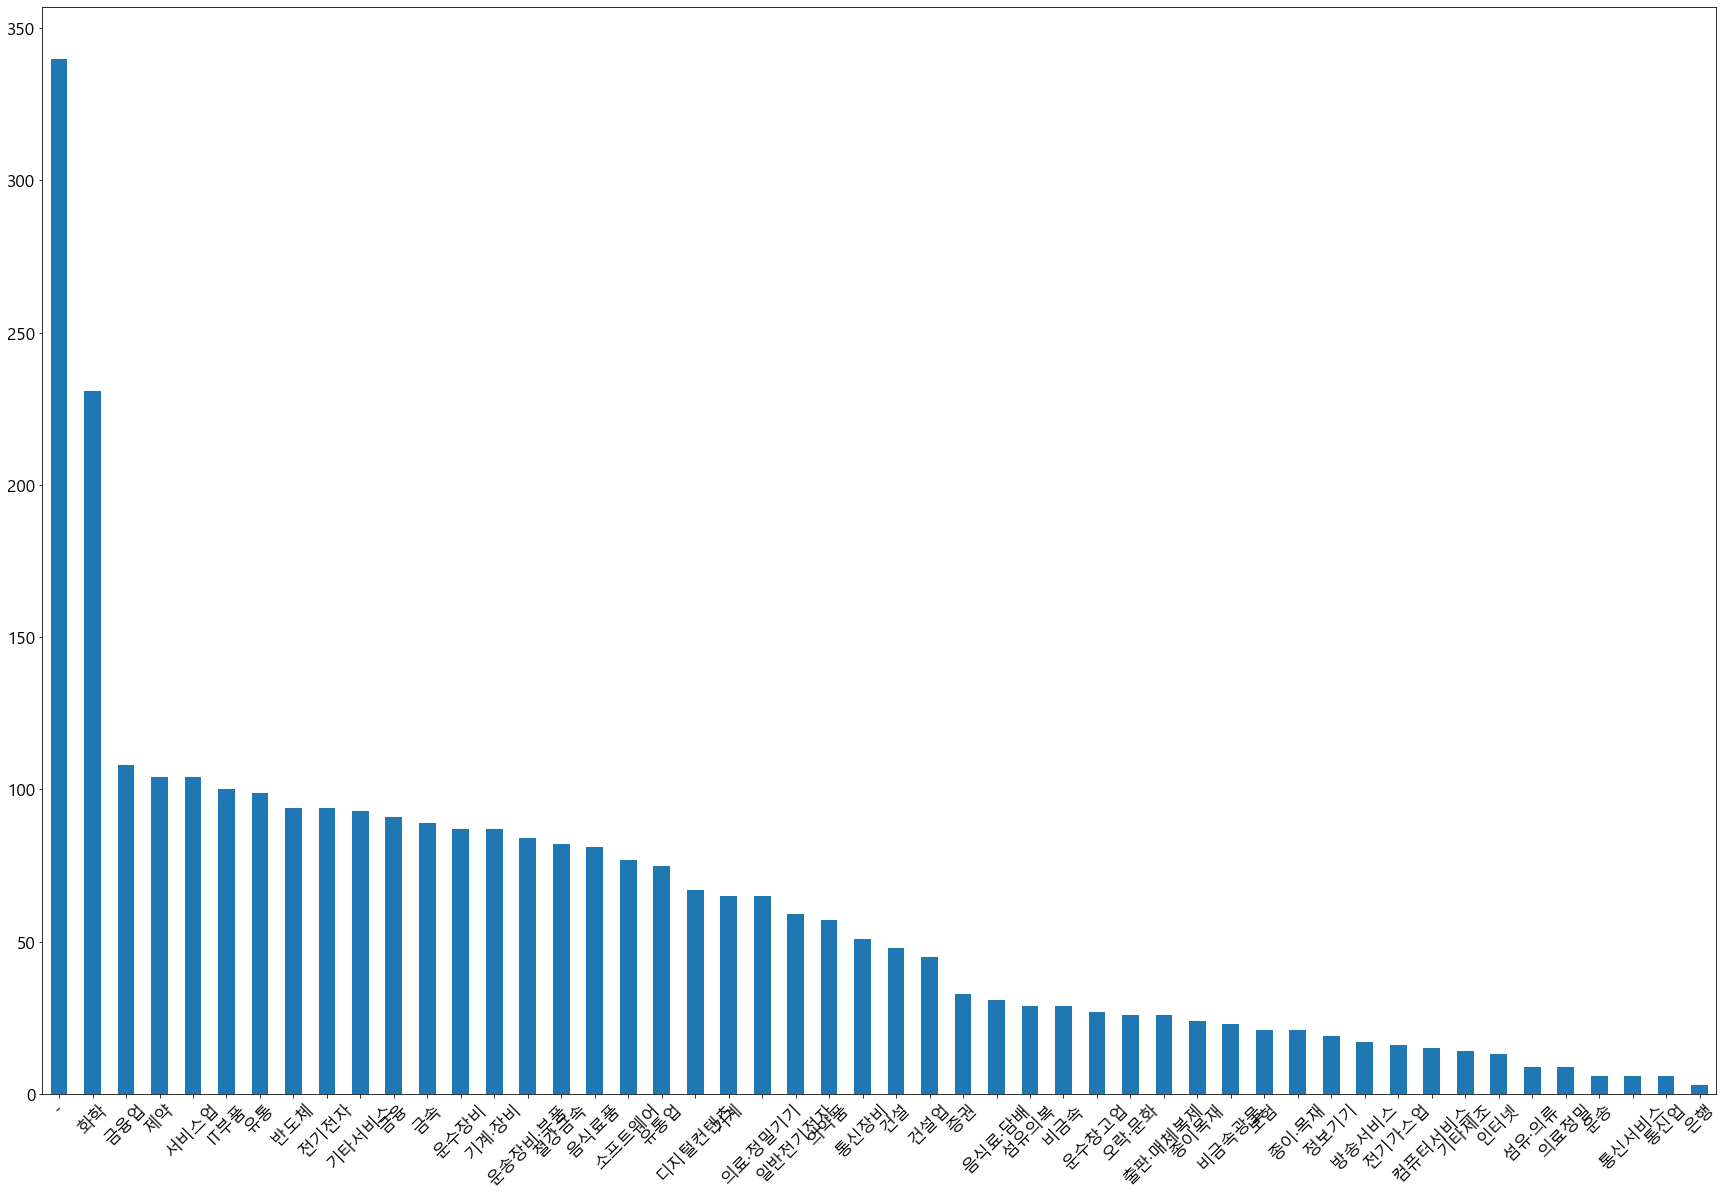

In [107]:
alloc.업종.value_counts().plot(kind='bar')

plt.rcParams['figure.figsize'] = [30, 20] # [width, height] (inches)  
plt.xticks(rotation=45)
plt.rc('font', size=17) # controls default text sizes
plt.rcParams['font.family'] = 'Malgun Gothic'

### ( - ) , 화학, 금융업, 제약, 등등 순으로 가장 많다고 나오네요. 정말 그럴까요?

In [71]:
alloc['업종'].drop_duplicates().sort_values(ascending=False)    # 오름차순 정렬!

63           화학
15         통신장비
342         통신업
945       통신서비스
1266     컴퓨터서비스
384     출판·매체복제
108        철강금속
78           증권
570        종이목재
807       종이·목재
51           제약
582        정보기기
84         전기전자
465       전기가스업
162      일반전기전자
579         인터넷
213         의약품
1467       의료정밀
909     의료·정밀기기
42         음식료품
798      음식료·담배
882          은행
20          유통업
48           유통
39        운수창고업
306        운수장비
234     운송장비·부품
2616         운송
225       오락·문화
264       소프트웨어
27         섬유의복
135       섬유·의류
3          서비스업
466       비금속광물
453         비금속
81           보험
36        방송서비스
12          반도체
57       디지털컨텐츠
420        기타제조
117       기타서비스
0         기계·장비
186          기계
6           금융업
9            금융
228          금속
90          건설업
237          건설
282        IT부품
73            -
Name: 업종, dtype: category
Categories (50, object): ['-', 'IT부품', '건설', '건설업', ..., '통신서비스', '통신업', '통신장비', '화학']

## 73번 이상한 업종 ( - ) 이 보이네요... 저게 뭘까요.. 네이버 증권 (업종) 항목 비교해보겠습니다.
##### 그런데, 여기에는 (운수창고업/운수장비_부품/운수장비/운송)   있는 반면에, 네이버 증권에는 (운수인프라)  딱 하나로 되어있습니다.
##### 그리고, (우주항공과국방) 같은 항목이 여기에는, 보이지 않네요...


### ---- 네이버 주식 확인 결과 ----
##### 거래가능한, 주식회사 100개 넘는 업종  =  기계(101) 기타(779) 화학(114) 자동차부품(145) 반도체와반도체장비(120) 제약(143) 
### (기타) 업종이 779 나 됩니다!!  
## ★ 자세히 보니, (기타)에는 거의 다 ETF, ETN, 레버리지, 인버스 등등, 특수한 주식들만 있네요.
## ★ (-) 에서 (위험주식) 으로 바꿔주겠습니다.

### 그런데, (화학) 업종이 가장 많지도 않아요!...   (자동차부품) = 145 로 가장 많다고 뜨는데,,, 데이터를 잘못 가져온 걸까요?
### 아뇨!! 그냥 (네이버) 와 (KIND) 에서 주식 업종을 분류하는게 다른 겁니다..  일단 해보죠!

In [72]:
alloc[['주식배당', '회사명']].drop_duplicates('주식배당').drop_duplicates('회사명')

,주식배당,회사명
0,-,3S
104,0.0239077 / (2018-12-31),DRB동일
203,0.02 / (2018-12-31),ISC
390,0.07 / (2020-12-31),NHN한국사이버결제
468,0.3 / (2020-12-31),SGC이테크건설
499,0.01 / (2019-12-31),SK가스
551,0.03 / (2018-12-31),SNT에너지
576,0.0220324 / (2020-12-31),TCC스틸
630,0.02 / (2020-12-31),가온미디어
930,0.1 / (2020-12-31),나스미디어


In [73]:
print(alloc.loc[(alloc['주식배당'] == '-')].sum())

회사명      3S3S3SAJ네트웍스AJ네트웍스AJ네트웍스AK홀딩스AK홀딩스AK홀딩스APS홀딩스A...
종목코드                                             313892880
사업연도                                               5923752
업종별                                                   2986
주식배당     ----------------------------------------------...
액면가                                                    inf
기말주식수                                         134435472766
주당배당금    ---210300100400750750---12050150-70-110110352,...
배당성향     ----296.43333.3428.715-1.96317.0524.735--19.16...
총배당금액    ---9,832,681,95014,046,688,5004,682,229,5005,2...
시가배당률    ---4.66.12.31.632.21.37---0.50.10.7-1-2.220.41...
dtype: object


C:\Users\chemy\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


### ★ (주식배당) 칼럼에는, 2986개 인덱스들이 모두 ( - 값, 즉 na값)을 갖고 있는 것을 알 수 있습니다.  
### 이 부분은,,, 

#### 아까, 주식배당 = (배당수익률) 정보였죠?
#### 근데, 문제는, 
## ★ 1. 주식배당 = (배당수익률), 그게 진짜 맞냐?
## ★ 2. 그럼 배당을 주는 회사가 저거 밖에 안되냐??   하는 겁니다.
## 확인해봅시다.

### (주식배당) 0.069 로 2731번 이 가장 큽니다! 무슨 회사죠?

In [74]:
alloc.회사명[2731]

'서린바이오'

### (서린바이오) 배당이 6.9% 인지 확인해보죠!

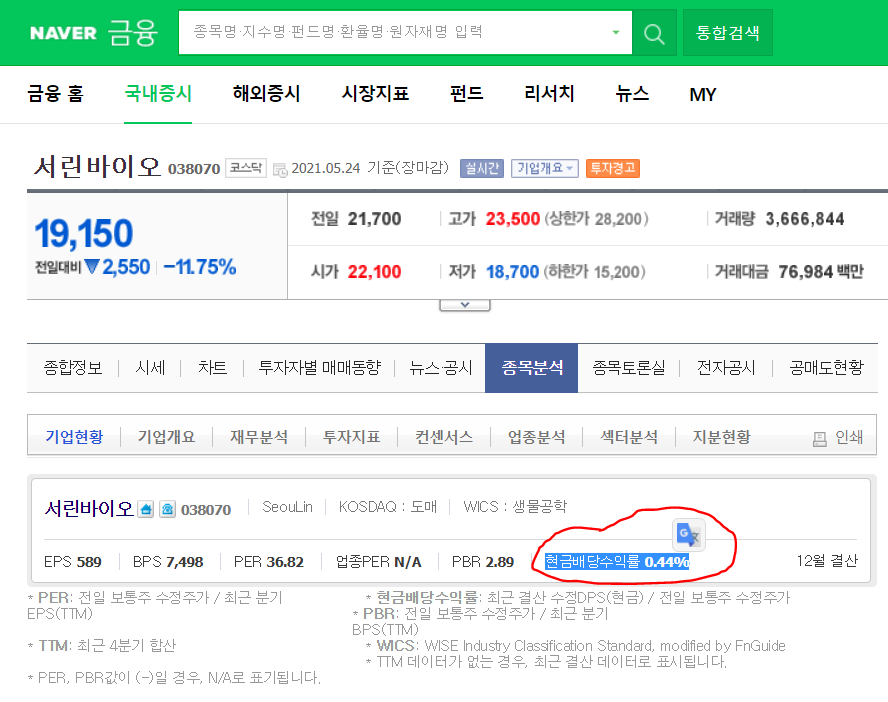

In [75]:
Image("C:/Users/chemy/Desktop/프3프로젝트/서린바이오_실제배당수익률.png")

# ★ 문제는,,, (서린바이오) 의 실제 (배당수익률) 은 (0.44) 라는 겁니다!!

### >>>  정보가 잘못됐거나, 제가 잘 이해를 못한 것입니다.
### "주식배당" != (배당수익률)     
## (X)   아닙니다!!!
### 일단, 이건 빼고 갑시다!


In [76]:
alloc.시가배당률.sum()

'---4.66.12.31.632.21.37---0.50.10.7-1-2.220.41.71.61.35.44.63.90.390.50.42.31.91.1--0.51.20.90.58------11.41.1-0.90.8---2.21.51.5---------0.90.90.8---------6.25.75.54.92.72.70.81.312.45.45.54.11.51.41.71.872.051.71---1.21.42.20.71.91.6---0.81.11.30.830.870.94.84.53.5-----0---------1.20.931.62----3.42.29---5.13.63.60.92.03-3.43.12.3--12.61.91.664.23.8---0.90.70.72.31.80.83.93.2-2.22.41.42.41.91---3.1-1---------------0.60.51.7---6.35.33.20.50.81.262.412.552.32-1.270.910.91.10.81.531.421.190.4160.6710.399---3.94.542.33.75.22.22.31.8222.30.791.232.07----0.441.92------1.83.2930.9--2.23.22.71.82.051.91.732--2.3---------2.12.22.1-1.31.6---0.691.692.9---4.84.43.94.94.74.2---2.873.513.514.66.3----3.63.153.543.123.863.130.560.670.923.42.7232.92.8---1.621.60.70.90.83.72.82.30.40.220.351.111.20.30.40.41.91.20.81.20.61.731.91.5232.5---2.62.32.84.15.66---0.10.20.3---1.4------11.263.83.71.51.111.21.71.751.972.242.18--0.78---20.92.60.61.11.090.230.570.88---5--00.20.7---3.11.51.7-0.7------1.50.82.8---

### 시가배당률도 깔끔하게!! 1.float 형 2.결측치는 0으로. 만들어 줄께요!

In [77]:
alloc.시가배당률 = alloc.시가배당률.str.replace('-','0').astype('float16')  

In [78]:
alloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   회사명     3000 non-null   object  
 1   종목코드    3000 non-null   int64   
 2   사업연도    3000 non-null   int16   
 3   결산월     3000 non-null   category
 4   업종      3000 non-null   category
 5   업종별     3000 non-null   float16 
 6   주식배당    3000 non-null   object  
 7   액면가     3000 non-null   float16 
 8   기말주식수   3000 non-null   int64   
 9   주당배당금   3000 non-null   object  
 10  배당성향    3000 non-null   object  
 11  총배당금액   3000 non-null   object  
 12  시가배당률   3000 non-null   float16 
dtypes: category(2), float16(3), int16(1), int64(2), object(5)
memory usage: 196.6+ KB


In [79]:
alloc.시가배당률.sort_values(ascending = False)

1726    32.500000
2751    17.734375
1549    16.796875
1203    16.203125
1932    11.898438
          ...    
1730     0.000000
1731     0.000000
1732     0.000000
1733     0.000000
0        0.000000
Name: 시가배당률, Length: 3000, dtype: float16

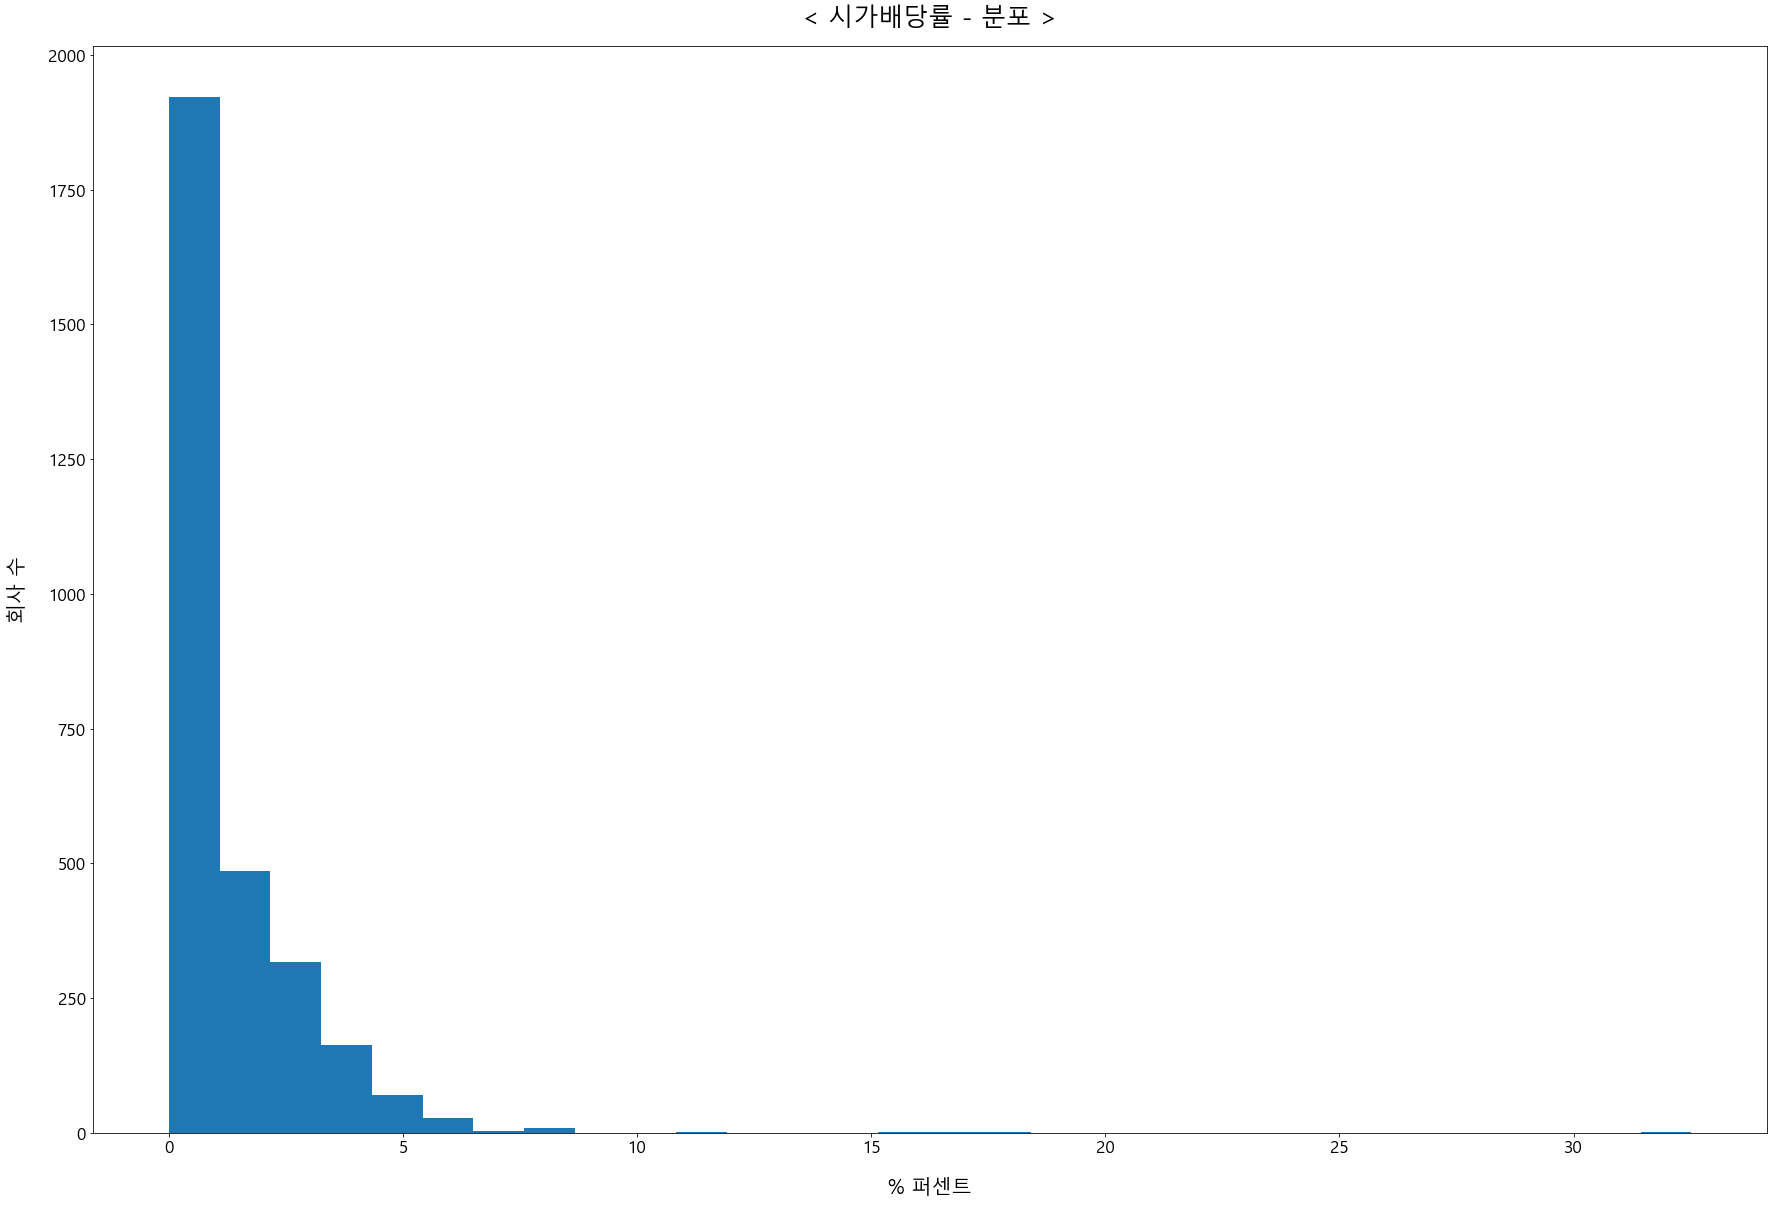

In [80]:
alloc.시가배당률.plot(kind='hist', bins=30)

plt.title('< 시가배당률 - 분포 >', pad=20, fontsize=25)
plt.xlabel('% 퍼센트', labelpad=20, fontsize=20)
plt.ylabel('회사 수', labelpad=20, fontsize=20)
plt.show()

### 2018, 2019 데이터가 같이 보이니까, 갯수가 괜히 많아 보입니다!
## ★ 2020년도 데이터만 보겠습니다!

In [81]:
alloc_2020 = alloc[alloc['사업연도'] == 2020]
alloc_2020

,회사명,종목코드,사업연도,결산월,업종,업종별,주식배당,액면가,기말주식수,주당배당금,배당성향,총배당금액,시가배당률
0,3S,60310,2020,3,기계·장비,1.339844,-,500.0,44802511,-,-,-,0.000000
3,AJ네트웍스,95570,2020,12,서비스업,0.680176,-,1000.0,46822295,210,-296.433,"9,832,681,950",4.601562
6,AK홀딩스,6840,2020,12,금융업,3.560547,-,5000.0,13247561,400,-1.963,"5,218,198,000",1.629883
9,APS홀딩스,54620,2020,12,금융,1.040039,-,500.0,20394221,-,-,-,0.000000
12,AP시스템,265520,2020,12,반도체,0.469971,-,500.0,14480227,120,8.452,"2,108,917,920",0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,셀젠텍,258250,2020,12,-,0.000000,-,500.0,4054339,-,-,-,0.000000
2988,셀트리온,68270,2020,12,의약품,0.109985,0.02 / (2020-12-31),1000.0,134997805,-,-,-,0.000000
2991,셀트리온제약,68760,2020,12,제약,0.199951,0.02 / (2020-12-31),500.0,35810637,-,-,-,0.000000
2994,셀트리온헬스케어,91990,2020,12,유통,0.180054,0.02 / (2020-12-31),1000.0,151809822,-,-,-,0.000000


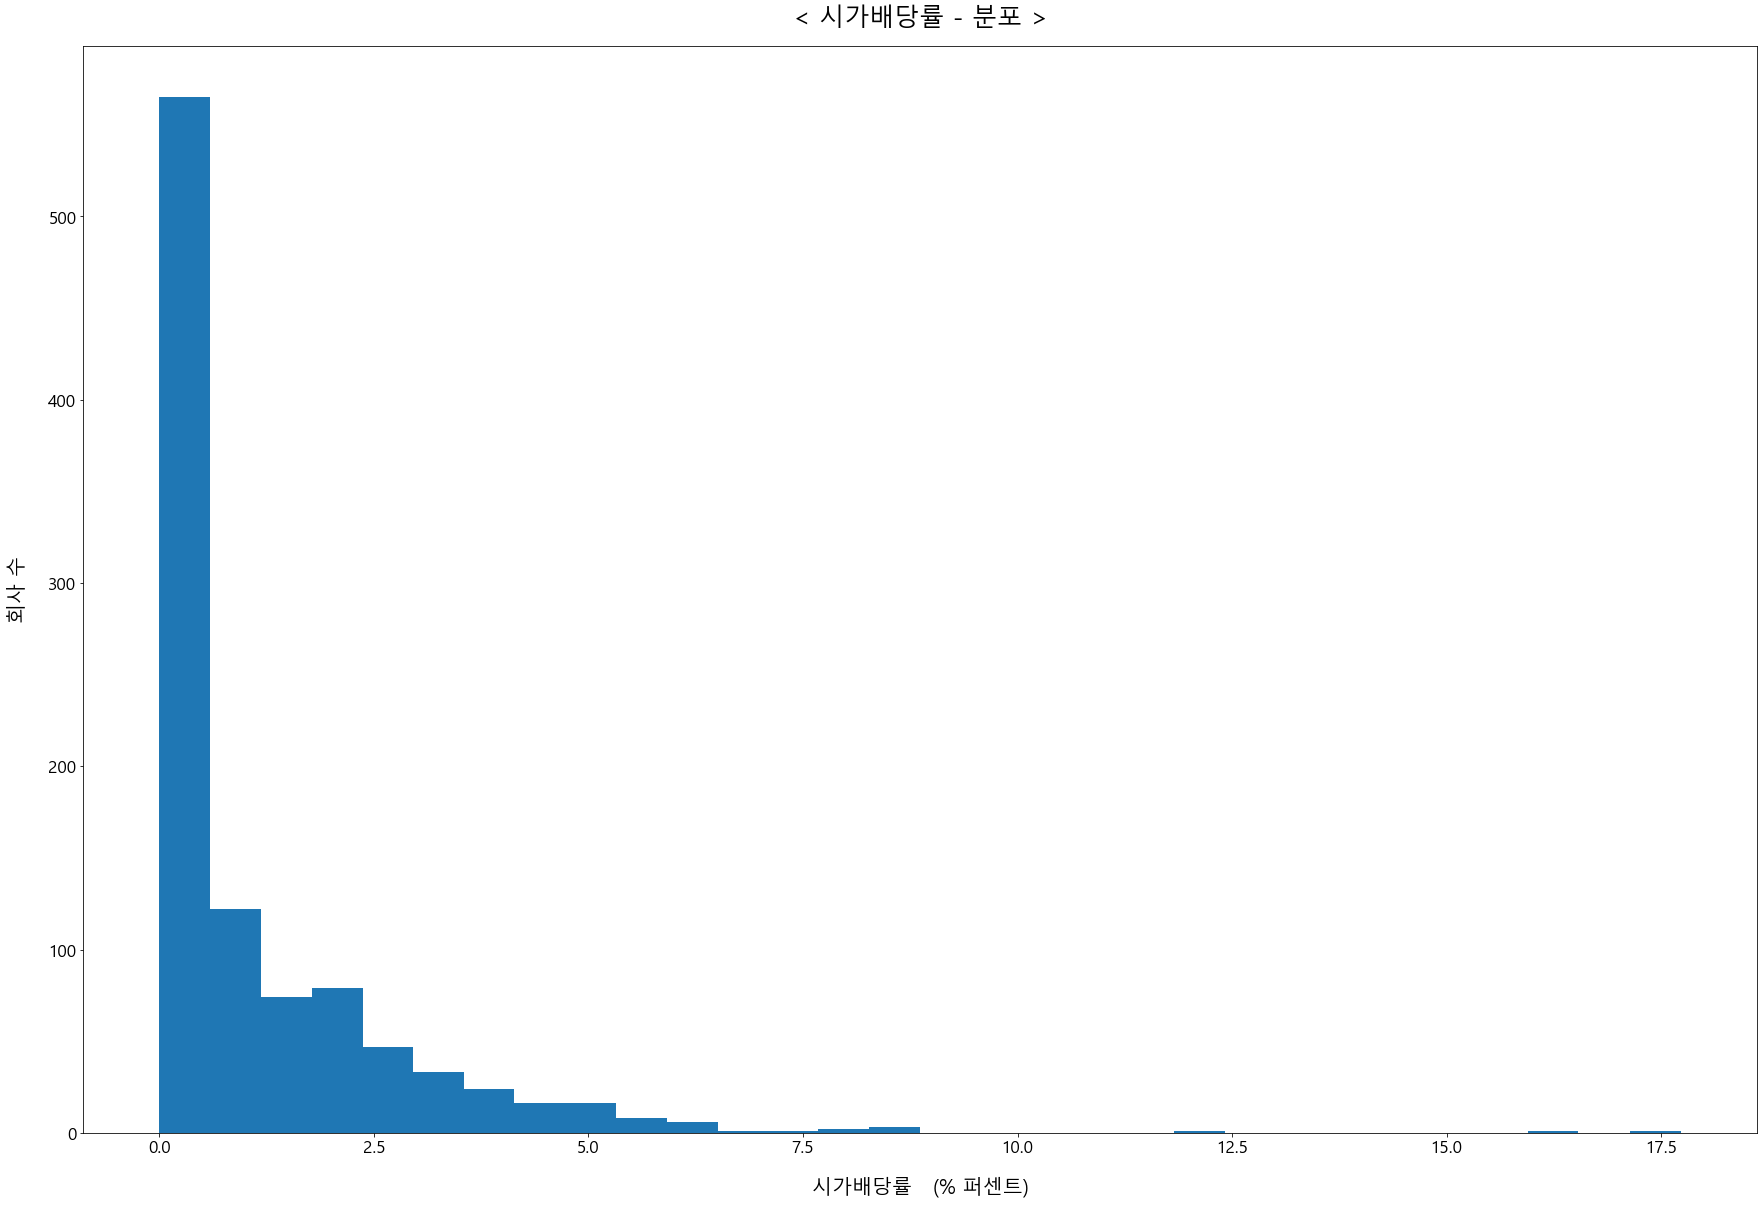

In [82]:
alloc_2020.시가배당률.plot(kind='hist', bins=30)

plt.title('< 시가배당률 - 분포 >', pad=20, fontsize=25)
plt.xlabel('시가배당률   (% 퍼센트)', labelpad=20, fontsize=20)
plt.ylabel('회사 수', labelpad=20, fontsize=20)
plt.show()

### (배당) 5 % 넘는 회사는 거의 없네요?
## ★ 배당 5 % 넘게 주는 회사만 한번 봅시다!!

## ★ 잠깐! 그전에, (배당성향) 이 뭔지 좀 알아봅시다!

# ★ 배당성향  vs  배당수익률

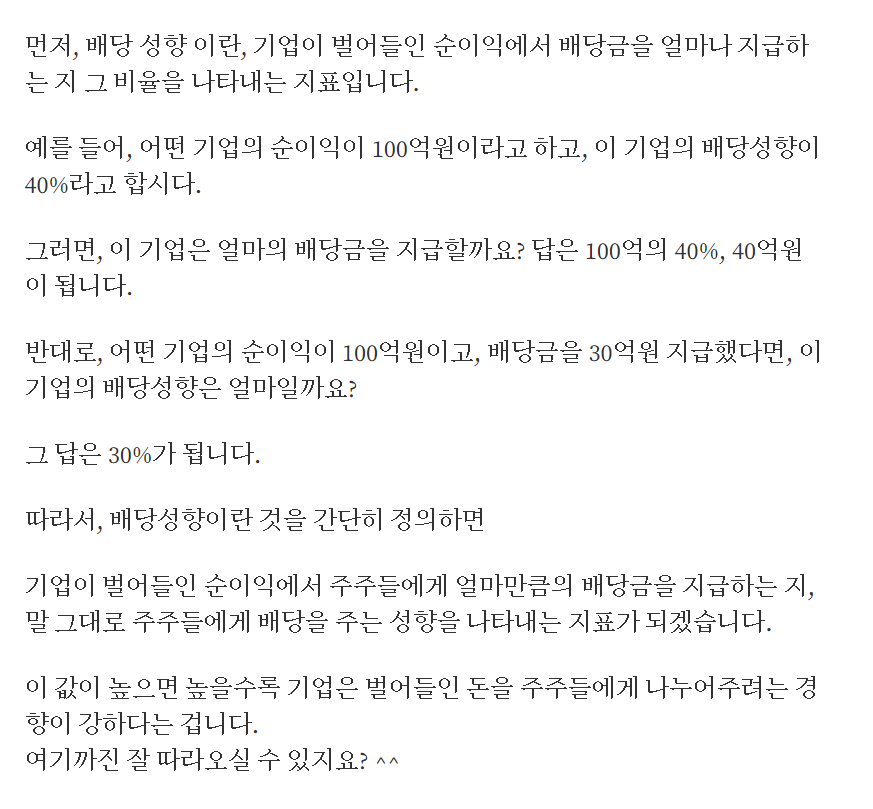

In [83]:
Image("C:/Users/chemy/Desktop/프3프로젝트/배당성향이란.png")

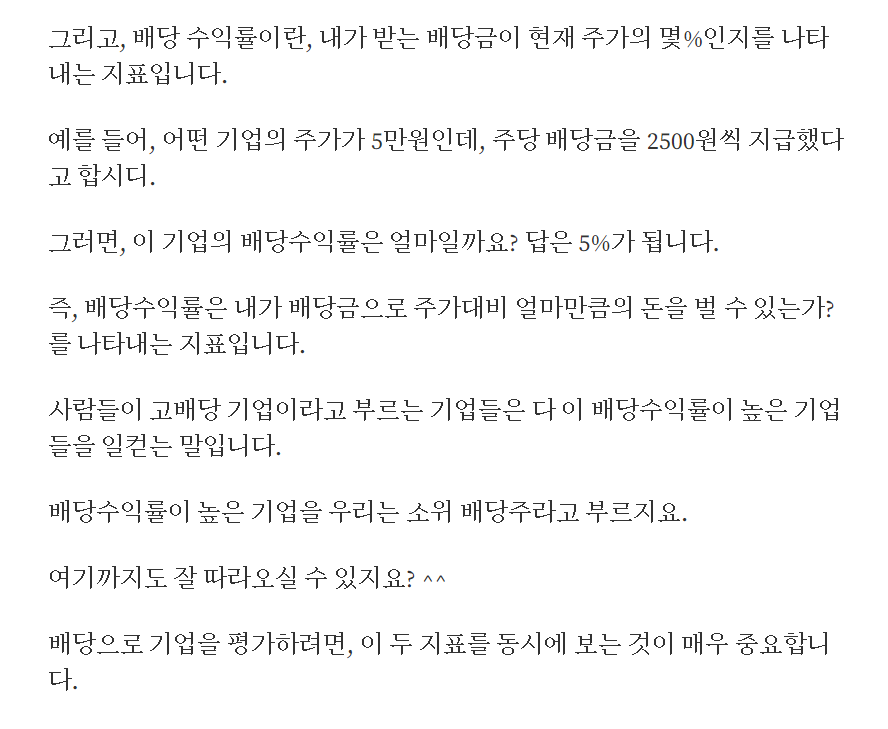

In [84]:
Image("C:/Users/chemy/Desktop/프3프로젝트/배당수익률이란.png")

## 둘다, 높을수록 좋아보이죠?
## ★ 근데, 여기 함정이 있습니다.
#### 만약에, 현재 배당수익률 = 10% 였고, 배당성향 = 10 %, 순이익이 5000억인 A 회사가 있었습니다.
#### 그리고, 배당수익률 = 2 % 였고, 배당성향 = 5% 이고, 순이익이 3000억인 B 회사가 있었습니다.
#### 민수는 "오! 배당 높다! 순이익도 거의 1.6배! 개꿀!" 하면서, 11월달 즈음에 A 주식을 5000만원어치 삽니다.
#### 반면에, 철수는, 미래는 아무도 모른다. 구글신도 모른다. 면서, B주식을 5000만원어치 샀니다.
## ★ 그런데,, 12월에 결산을 하고, 결과를 보니, A 회사 순이익이 반토막도 더 났습니다. 2000억으로 떡락한거죠?
#### B 회사의 결산서를 보니, 순이익이 2배 뛴, 6000억이 됐습니다!!
## 문제. 그럼 A, B 회사 중에 배당금이 높은 회사는 어디일까요?
## A - 10% x 2000억 = 200억  
## B - 5% * 6000억 =  300억   
## B 가 배당금이 (1.5배) 많습니다.

# ★ 제 개인적으로는, (배당성향) 높은 주식이 땡기네요? ^__^  
#### 기업의 미래에 대한 의지를 나타내는 지표 같습니다. 돈도 많이 벌어서, 배당도 많이 주고, 투자금도 더 많이 늘려가겠다? 처럼요.
### 아무튼 (배당성향) 좀 봅시다!

In [85]:
alloc_2020.배당성향.drop_duplicates()

0              -
3       -296.433
6         -1.963
12         8.452
18        58.878
          ...   
2925     142.241
2934     253.597
2943      26.844
2952    14.101 *
2997     9.175 *
Name: 배당성향, Length: 513, dtype: object

In [86]:
alloc_2020.배당성향.sum()

'--296.433-1.963-8.452-58.87833.78718.4555.07832.928-50.537--8.158--5.907---4.847---11.62723.5429.1617.5078.79612.141 *-6.03415.374-8.91310.911 *22.581-----17.948----95.8448.55429.125-44.84840.524-184.4097.16338.50829.33217.955-26.029-----37.883-18.597-7.16846.939--46.805112.67217.241-19.69258.9219.635 *20.274 *-1.121----14.25714.96136.32217.5853.348----12.334--32.065-20.3016.527-51.3234.792-28.66335.914 *51.514 *49.76228.533-3.97922.68141.0987.01510.512-3.832-1.857114.06433.69420.676-72.98759.9-7.015-62.218 *--36.51719.31134.84911.785 *--50.042 *9.626150.798--33.493-0.012-48.469---18.981------83.6751.225---10.103-292.585---48.56113.52962.395.75325.273-23.566---35.6910.24947.65516.816---40.42255.11488.50612.337-47.661-----66.404-20.178----11.4057.813-22.115----76.556--15.75226.345-3.29336.07124.812-12.965--046.445--84.005 *--33.59311.33927.1036.614104.35724.96725.422 *-27.15424.082-5.5711.98112.76210.792 *37.1446.12220.04122.205 *-81.171--2.19341.8217.565-9.1629.009-14.35-12.906 *-53.3

In [87]:
alloc_2020.배당성향 = alloc_2020.배당성향.str.replace('-','').replace('*','')

C:\Users\chemy\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [88]:
alloc_2020.배당성향 = alloc_2020.배당성향.fillna(np.nan)

## 마이너스 (-) 값도 보이네요.
## ★ 어차피 지금 보고싶은 건, (배당성향) = 높고, (시가배당률) = 높은거죠?

In [89]:
alloc_2020.배당성향.value_counts()

            484
0             3
7.015         2
13.181        2
17.99         1
           ... 
2.328 *       1
29.402        1
23.014 *      1
4.169         1
9.359         1
Name: 배당성향, Length: 513, dtype: int64

In [90]:
alloc_2020.배당성향 = alloc_2020.배당성향.str.replace('*','')

In [91]:
alloc_2020.배당성향 = alloc_2020.배당성향.replace(' ','')

In [92]:
alloc_2020.배당성향.sum()

'296.4331.9638.45258.87833.78718.4555.07832.92850.5378.1585.9074.84711.62723.5429.1617.5078.79612.141 6.03415.3748.91310.911 22.58117.94895.8448.55429.12544.84840.524184.4097.16338.50829.33217.95526.02937.88318.5977.16846.93946.805112.67217.24119.69258.9219.635 20.274 1.12114.25714.96136.32217.5853.34812.33432.06520.3016.52751.3234.79228.66335.914 51.514 49.76228.5333.97922.68141.0987.01510.5123.8321.857114.06433.69420.67672.98759.97.01562.218 36.51719.31134.84911.785 50.042 9.626150.79833.4930.01248.46918.98183.6751.22510.103292.58548.56113.52962.395.75325.27323.56635.6910.24947.65516.81640.42255.11488.50612.33747.66166.40420.17811.4057.81322.11576.55615.75226.3453.29336.07124.81212.965046.44584.005 33.59311.33927.1036.614104.35724.96725.422 27.15424.0825.5711.98112.76210.792 37.1446.12220.04122.205 81.1712.19341.8217.5659.1629.00914.3512.906 53.35620.69920.959101.83421.24112.08211.96113.495353.936 68.14247.365 65.72443.36956.93329.08767.9219.86525.64250.41426.95224.0939.631 9.82969.4

In [93]:
alloc_2020.배당성향.head(5)

0            
3     296.433
6       1.963
9            
12      8.452
Name: 배당성향, dtype: object

In [94]:
alloc_2020.isnull().sum()

회사명      0
종목코드     0
사업연도     0
결산월      0
업종       0
업종별      0
주식배당     0
액면가      0
기말주식수    0
주당배당금    0
배당성향     0
총배당금액    0
시가배당률    0
dtype: int64

In [96]:
alloc_2020.배당성향.astype('float64')

ValueError: could not convert string to float: ''

In [97]:
alloc_2020.배당성향.dtype

dtype('O')

In [98]:
alloc_2020.배당성향.head(5)

0            
3     296.433
6       1.963
9            
12      8.452
Name: 배당성향, dtype: object

### ★★★ 원래 계획은, (배당성향) 의 분포를 시각적으로, 잘 보여드리려고 했는데, 계속 에러가 나네요..

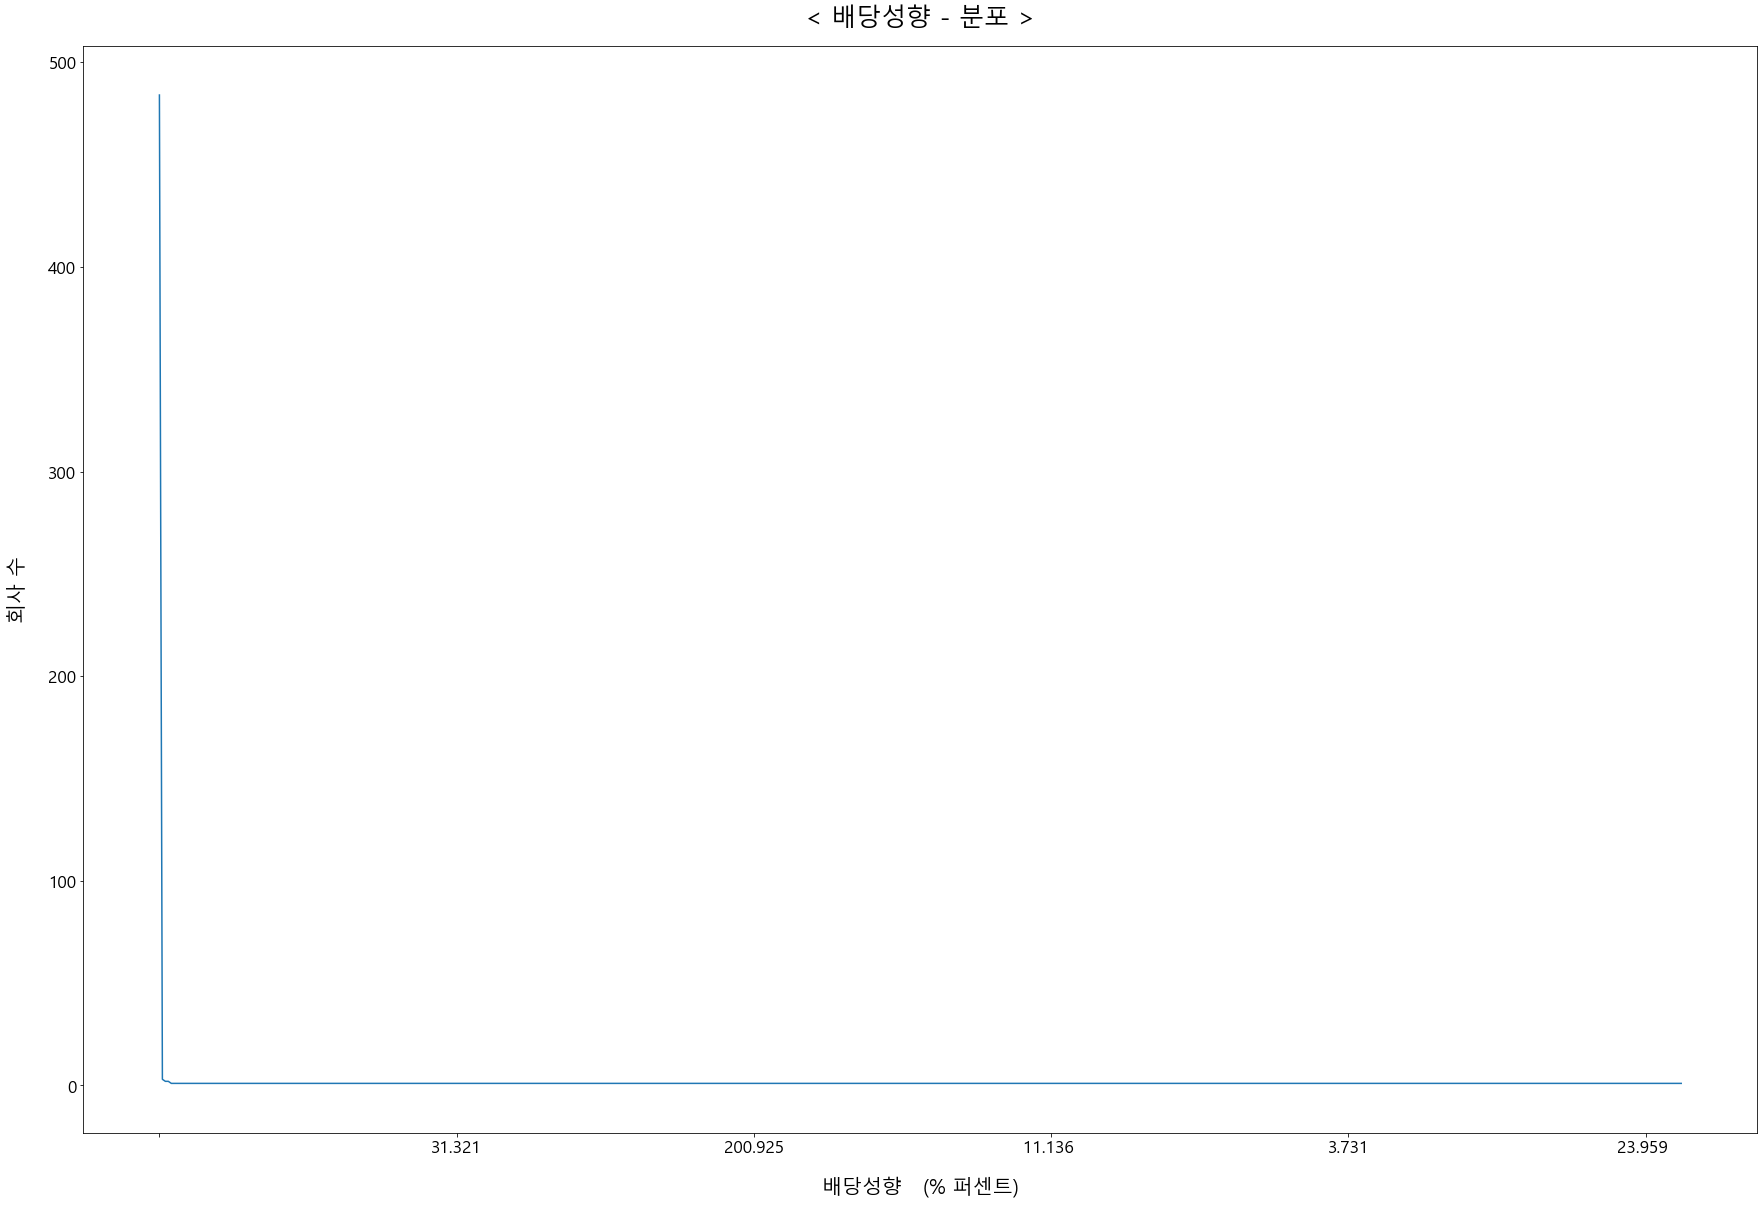

In [102]:
alloc_2020.배당성향.value_counts().plot()


plt.title('< 배당성향 - 분포 >', pad=20, fontsize=25)
plt.xlabel('배당성향   (% 퍼센트)', labelpad=20, fontsize=20)
plt.ylabel('회사 수', labelpad=20, fontsize=20)
plt.show()

## 아까 위에서 얻은, 29개 회사들의 (배당성향) 을 포함해서, 더 찾아보겠습니다.
###### 22          기업은행
###### 43           휴스틸
###### 44       한일현대시멘트
###### 108      두산인프라코어
###### 124         키움증권
###### 136         동부건설
###### 221         이수화학
###### 255           원림
###### 379        디아이동일
###### 403          HMM
###### 430         우성사료
###### 533        SK케미칼
###### 542        두산중공업
###### 563         금호건설
###### 569         ES큐브
###### 610     SGC이테크건설
###### 642         에이리츠
###### 649         DL건설
###### 652      현대코퍼레이션
###### 671       미래에셋증권
###### 683           기아
###### 707       신원종합개발
###### 818         대한항공
###### 870         GS건설
###### 894        한화솔루션
###### 963       SNT모티브
###### 1071       현대모비스
###### 1210       풍산홀딩스

In [103]:
(
stock1
.sort_values('액면가', ascending=False)
.head(50)
.drop_duplicates('회사명')
.sort_values('발행주식수', ascending=True)
.head(30)
)

,회사명,발행주식수,액면가
430,우성사료,-27810000.0,5000.0
944,두산중공업,171.0,5000.0
437,키움증권,2850.0,5000.0
533,SK케미칼,10000.0,5000.0
136,동부건설,19891.0,5000.0
379,디아이동일,45046.0,5000.0
255,원림,97970.0,5000.0
1123,이수화학,195312.0,5000.0
1085,신원종합개발,200000.0,5000.0
403,HMM,383252.0,5000.0


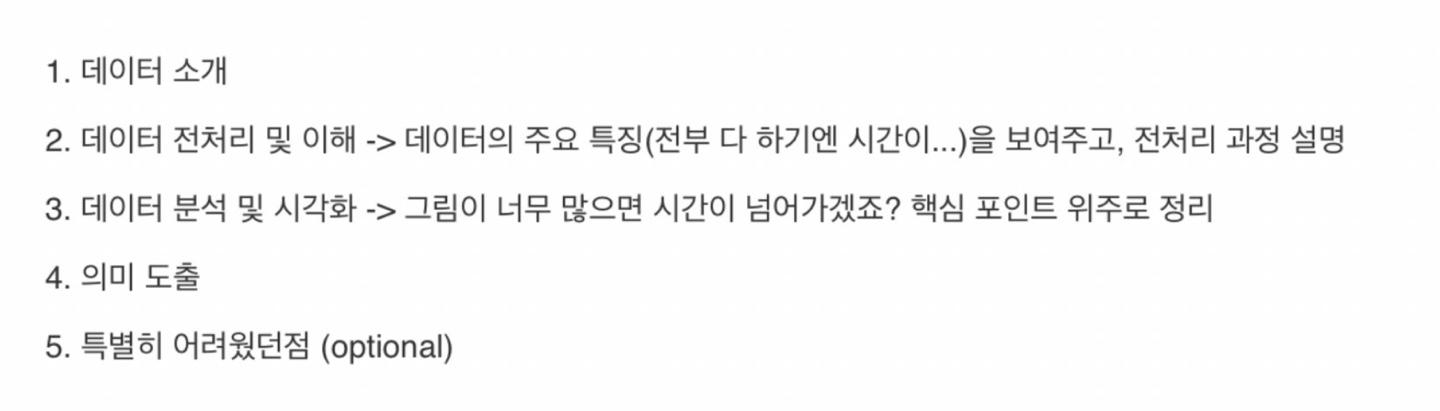

In [104]:
Image("C:/Users/chemy/Desktop/프3프로젝트/느낀점.jpg")

# ★ 느낀점! + self_평가
### 평가기준 5가지. 중에
### 2. 데이터를 분석이 용이하게 변환하였는가?  
### >>> 주식데이터를 많이 보아와서, 익숙하긴 했는데, 그래도 모르는 용어들이 많아서, 그런 부분이 시간이 좀 걸렸던 것 같습니다.
### 3. 데이터 전처리 및 이해, 주요 특징 설명 잘하였는가?  >>>  핵심 포인트 위주로 정리해서 설명을 하였나??  질문에 대해서는? 
### 4. 데이터로부터 의미있는 결과를 도출하였는가?   
### 5. 특별히 어려웠던 점 :  
### - (1). 하나하나 전처리를 거칠 때, 아직 익숨함이 덜해서, 시간이 좀 걸렸습니다. 
### - (2). 의미를 도출하는 것이 어려웠던 것 같습니다. 의미를 도출하려고, 목표를 정하는 것도 쉬운 일이 아니네요.

## 감사합니다!